In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 204us/step - loss: 0.2592 - acc: 0.9205 - val_loss: 0.0580 - val_acc: 0.9818
Epoch 2/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0872 - acc: 0.9744 - val_loss: 0.0408 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0649 - acc: 0.9808 - val_loss: 0.0344 - val_acc: 0.9886
Epoch 4/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0554 - acc: 0.9841 - val_loss: 0.0328 - val_acc: 0.9885
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0474 - acc: 0.9856 - val_loss: 0.0318 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0427 - acc: 0.9871 - val_loss: 0.0271 - val_acc: 0.9903
Epoch 7/12
60000/60000 [==============================] - 9s 148us/step -

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)

In [10]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025898675751027167
Test accuracy: 0.9917


In [11]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

In [12]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 300, replace=False)]

In [13]:
print(x_train.shape[0])

60000


In [14]:
print(background.shape)

(300, 28, 28, 1)


In [15]:
# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)

In [31]:
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:6])

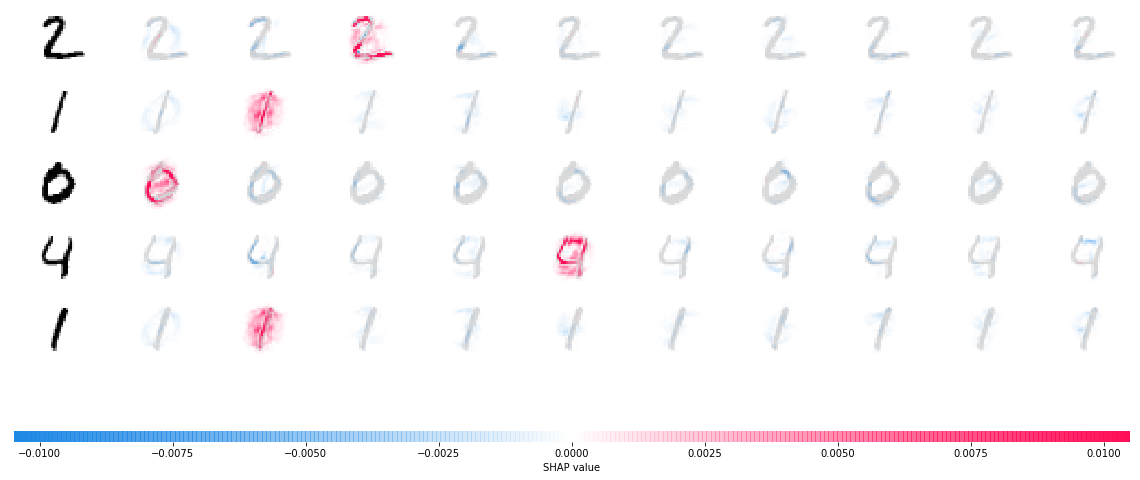

In [32]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:6])

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred_classes = np.argmax(y_pred, axis = 1) 

In [20]:
print(y_pred_classes)

[7 2 1 ... 4 5 6]


In [21]:
y_true = np.argmax(y_test, axis = 1) 

In [22]:
print(y_true)

[7 2 1 ... 4 5 6]


In [23]:
errors = (y_pred_classes - y_true != 0)

In [24]:
print (errors)

[False False False ... False False False]


In [25]:
fail_index, = np.where(errors == 1)

In [27]:
print(fail_index)

[ 321  340  445  582  659  740  813  882  947 1014 1039 1226 1232 1247
 1260 1326 1393 1414 1530 1621 1681 1709 1878 1901 2035 2040 2070 2098
 2118 2129 2130 2135 2182 2293 2406 2462 2488 2597 2654 2896 2921 2939
 3030 3060 3422 3503 3520 3558 3767 3808 3853 3906 3941 4078 4176 4256
 4507 4536 4571 4740 4761 4807 4823 5937 5955 6091 6166 6173 6560 6576
 6597 6651 6783 8408 8527 9009 9015 9019 9530 9642 9692 9729 9770]


In [28]:
print(fail_index[0:10])

[ 321  340  445  582  659  740  813  882  947 1014]


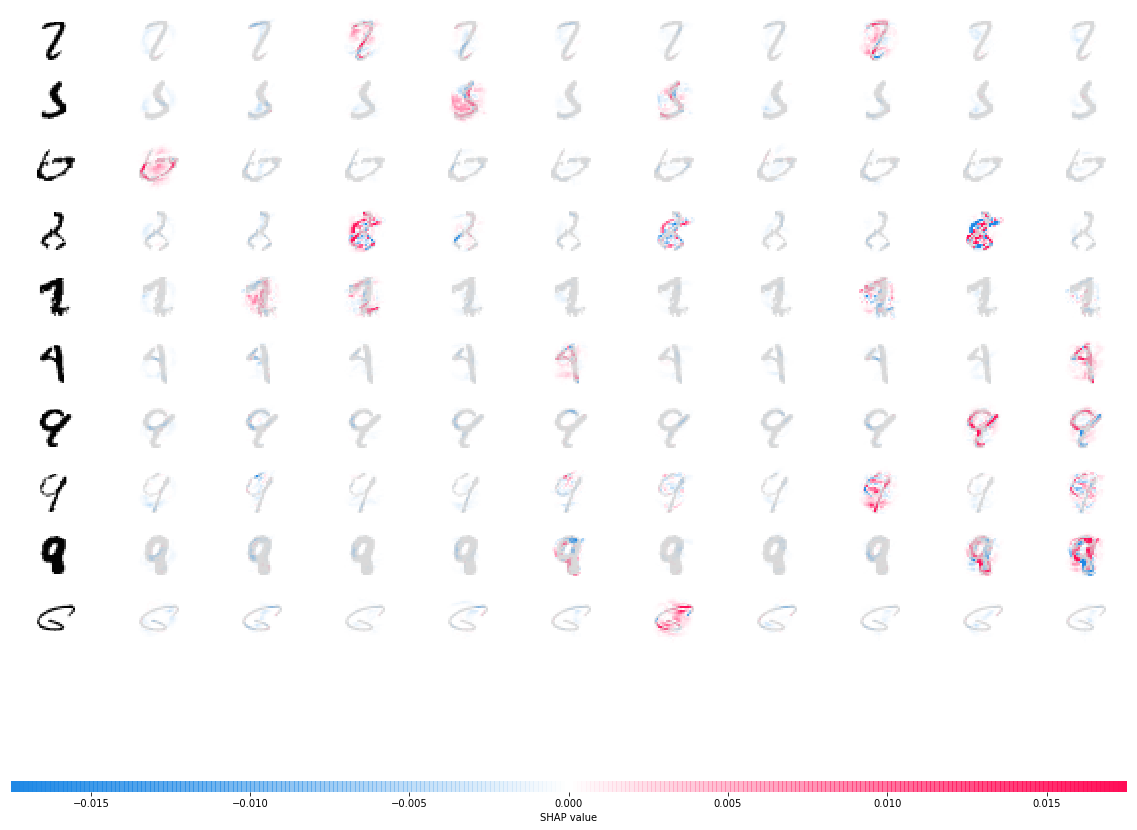

In [29]:
shap_values = e.shap_values(x_test[fail_index[0:10]])
shap.image_plot(shap_values, -x_test[fail_index[0:10]])